# Linear Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Read in the scores dataset.
data = pd.read_csv("./data/scores_synth.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   income               1000 non-null   float64
 1   score                1000 non-null   float64
 2   internet_connection  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [3]:
data.head()

,income,score,internet_connection
0,69.454075,635.305372,1
1,47.632800,743.301322,1
2,22.905094,673.037833,1
3,4.465032,442.894112,0
4,19.360381,627.178633,1


In [40]:
# Using pandas, use a single function that gets the count, mean, standard deviation, quantile values and maximum values.

In [4]:
data.describe()

,income,score,internet_connection
count,1000.000000,1000.000000,1000.000000
mean,25.132120,609.472997,0.691000
std,17.217098,82.097653,0.462312
min,0.893344,294.585973,0.000000
25%,13.581826,553.830647,0.000000
50%,19.073273,612.714370,1.000000
75%,34.970305,668.431175,1.000000
max,77.006947,845.859379,1.000000


In [41]:
# Using pandas, use a single function to get the correlation between all variables.

In [5]:
data.corr()

,income,score,internet_connection
income,1.000000,0.655725,0.229461
score,0.655725,1.000000,0.286389
internet_connection,0.229461,0.286389,1.000000


In [ ]:
# one hot encode internet_connection

In [10]:
def _transform_column_into_dummies(dataframe, name_of_column):
    dummies = pd.get_dummies(dataframe[name_of_column], prefix=f"{name_of_column} = ")
    
    dataframe = pd.concat([dataframe, dummies], axis=1)
    
    dataframe = dataframe.drop([name_of_column], axis=1)
    
    return dataframe

In [13]:
data = _transform_column_into_dummies(data, "internet_connection")

In [14]:
data.head()

,income,score,internet_connection = _0,internet_connection = _1
0,69.454075,635.305372,False,True
1,47.632800,743.301322,False,True
2,22.905094,673.037833,False,True
3,4.465032,442.894112,True,False
4,19.360381,627.178633,False,True


In [42]:
# Using both income and internet_connection to predict score, split the dataset into a 80/20 split. Use a random state of 42.

In [16]:
X = data.drop(["score"], axis =1)
y = data["score"]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 42)

In [43]:
# Plot a scatter plot of the income (x-axis) and score (y-axis) of the training/testing observations.

<Axes: xlabel='income', ylabel='score'>

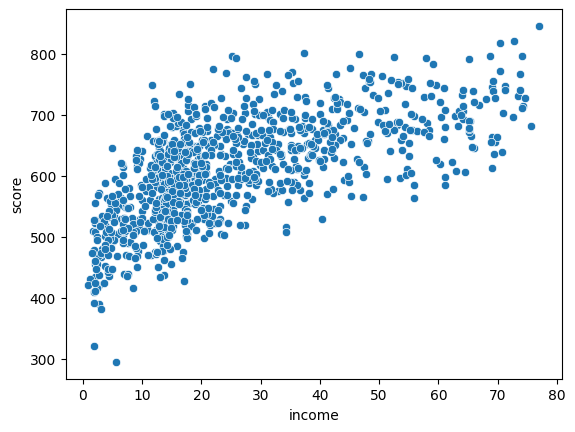

In [18]:
sns.scatterplot(data=data, x="income", y="score")

In [44]:
# Fit a linear regression model on the training dataset.

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
# model coefficients
print('multivariate beta_0 is',lr.intercept_)
print('multivariate beta_1 is', lr.coef_)

multivariate beta_0 is 529.6042918019245
multivariate beta_1 is [  2.90696131 -14.03334814  14.03334814]


In [45]:
# Predict on the testing set.

In [22]:
y_pred = lr.predict(X_test)

In [56]:
y_pred[0:4]

array([663.19392449, 668.10520203, 636.33038322, 755.41153291])

In [58]:
y_test[0:4]

521    686.023948
737    719.876049
740    644.171022
660    820.912090
Name: score, dtype: float64

In [64]:
np.median(y_pred - y_test)

-8.431321224752082

In [55]:
X_test

,income,internet_connection = _0,internet_connection = _1
521,41.127580,False,True
737,42.817069,False,True
740,31.886473,False,True
660,72.850606,False,True
411,16.929425,False,True
...,...,...,...
408,51.538172,False,True
332,15.339888,False,True
208,20.716769,False,True
613,13.926749,False,True


In [46]:
# Using only the testing scatter plot above with only income and score, plot the best fit line.
# Hint: Use the intercept and the correct coefficient to do so.

<Axes: xlabel='income', ylabel='score'>

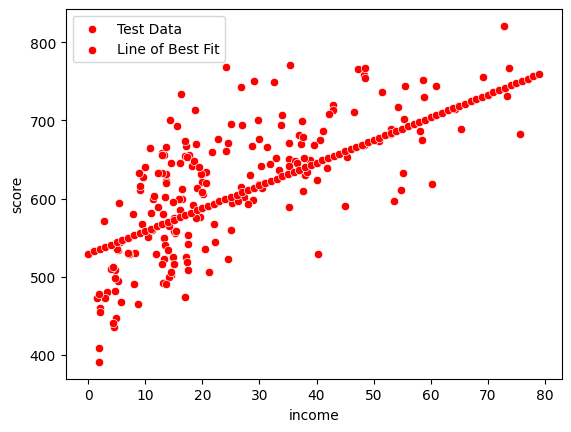

In [33]:
sns.scatterplot(
    x = X_test["income"],
    y = y_test,
    label = "Test Data",
    color = "red"
)

x_reg_line = list(range(0, 80))
# y = b0 + b1x
# using list comprehension
y_reg_line = [lr.intercept_ + (lr.coef_[0] * x) for x in x_reg_line]

sns.scatterplot(
    x = x_reg_line,
    y = y_reg_line,
    label = "Line of Best Fit",
    color = "red"
    
)
# change style to a line

# Metrics

For each of these metrics (MSE, RMSE, and MAE) and using <i><b>ONLY</b></i> the NumPy library, calculate these metrics from scratch. Then, compare this to Scikit-learn's version of these metrics by importing the necessary metric. Are your results similar or different? Why/Why not?

## Mean Squared Error

$$MSE = \frac{1}{N} \sum_i^N (Y_i-\hat{Y_i})^2$$

In [50]:
#using np and pd

predicts_df =pd.DataFrame()
predicts_df["actual"] = y_test 
predicts_df["predictions"] = y_pred

my_MSE = np.mean((predicts_df["actual"] - predicts_df["predictions"])**2)

print("my_MSE ", my_MSE)
     

my_MSE  3607.6591811565195


In [67]:
# got the same MSE
from sklearn.metrics import mean_squared_error
sklearn_MSE = mean_squared_error(y_test, y_pred)
print("sklearn ", sklearn_MSE)

sklearn  3607.6591811565195


## Root Mean Squared Error
$$RMSE = \sqrt{MSE}$$

In [68]:
# using np and pd
my_RMSE = np.sqrt(my_MSE)
print("my_RMSE ", my_RMSE)

my_RMSE  60.06379259717554


In [70]:
# using sklearn
sklearn_RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("sklearn_RMSE", sklearn_RMSE)

sklearn_RMSE 60.06379259717554


## Mean Absolute Error

$$MAE = \frac{1}{N} \sum_i^N |Y_i-\hat{Y_i}| $$

In [71]:
# np and pd first
my_MAE = np.mean(np.absolute(y_test - y_pred))
print("my_MAE ", my_MAE)

my_MAE  49.56023829540745


In [73]:
# sklearn
from sklearn.metrics import mean_absolute_error
sklearn_MAE = mean_absolute_error(y_test, y_pred)
print("sklearn_MAE", sklearn_MAE)

sklearn_MAE 49.56023829540745


## Challenge: Coefficient of Determination (R^2)
$$R^2 = 1 - \frac{\sum_{i=1}^{N}(y_i - \hat{y_i})^2 }{\sum_{i=1}^{N}(y_i - \bar{y})^2 }$$
such that ${y_i}$ is the _actual_ value of the $i$th observation, $\hat{y_i}$ is the _prediction_ of the $i$th observation, and $\bar{y}$ is the mean of all actual y values.

In [77]:
my_r_squared_numerator = np.sum((y_test - y_pred)**2)

In [79]:
my_r_squared_denominator = np.sum((y_test - np.mean(y_test))**2)

In [80]:
my_r_squared = 1 - (my_r_squared_numerator / my_r_squared_denominator)

In [81]:
print("my_r_squared ", my_r_squared)

my_r_squared  0.4824460840625965


In [83]:
from sklearn.metrics import r2_score
sklearn_r_squared = r2_score(y_test, y_pred)
print("sklearn_r_squared ", sklearn_r_squared)

sklearn_r_squared  0.4824460840625965
